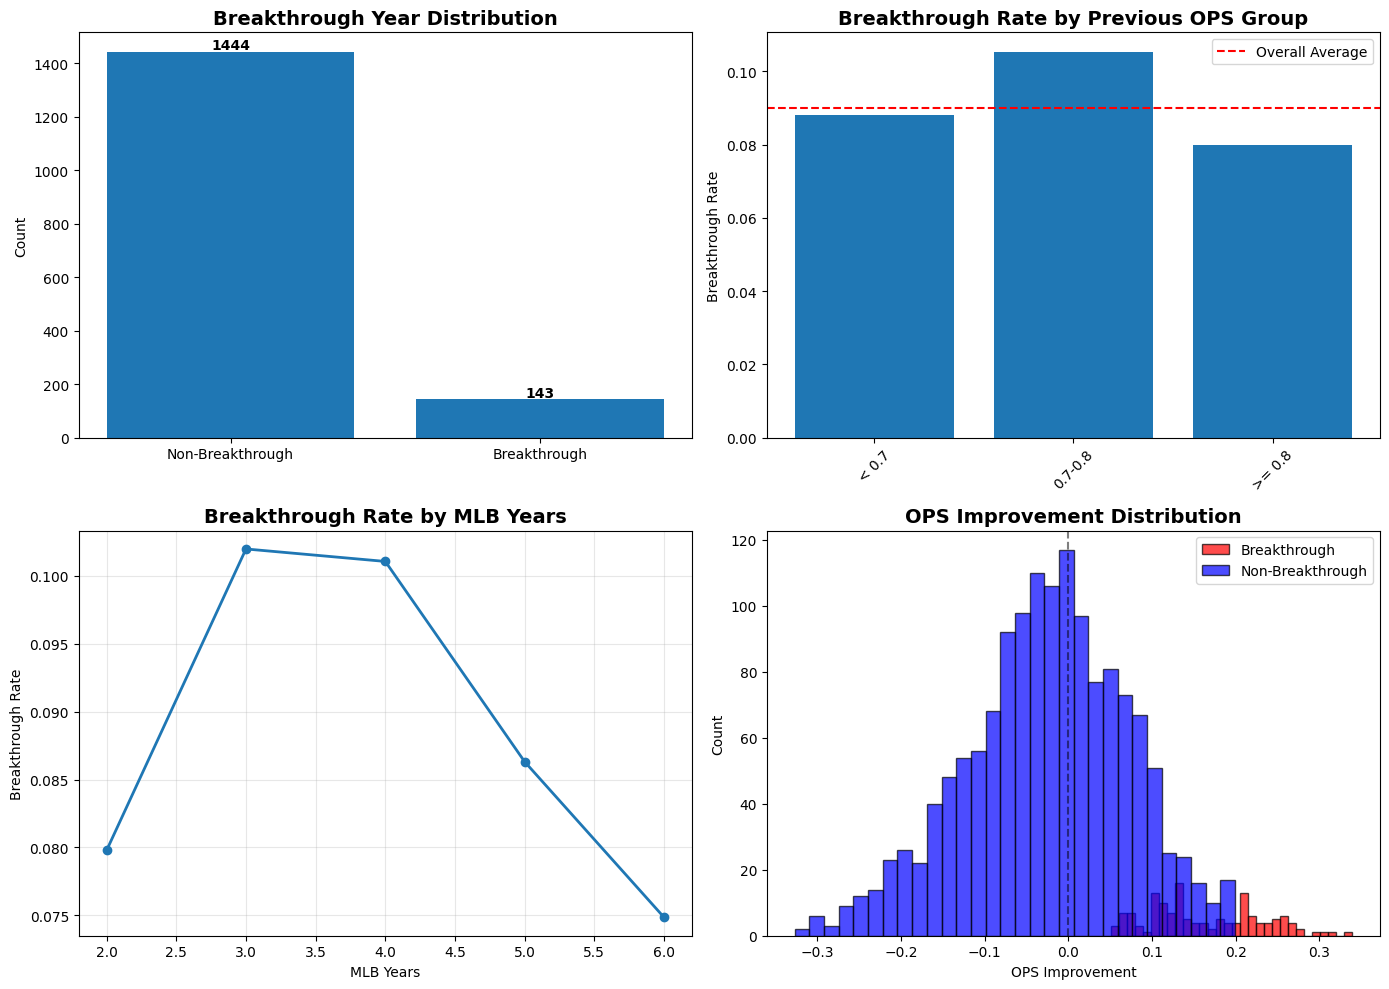

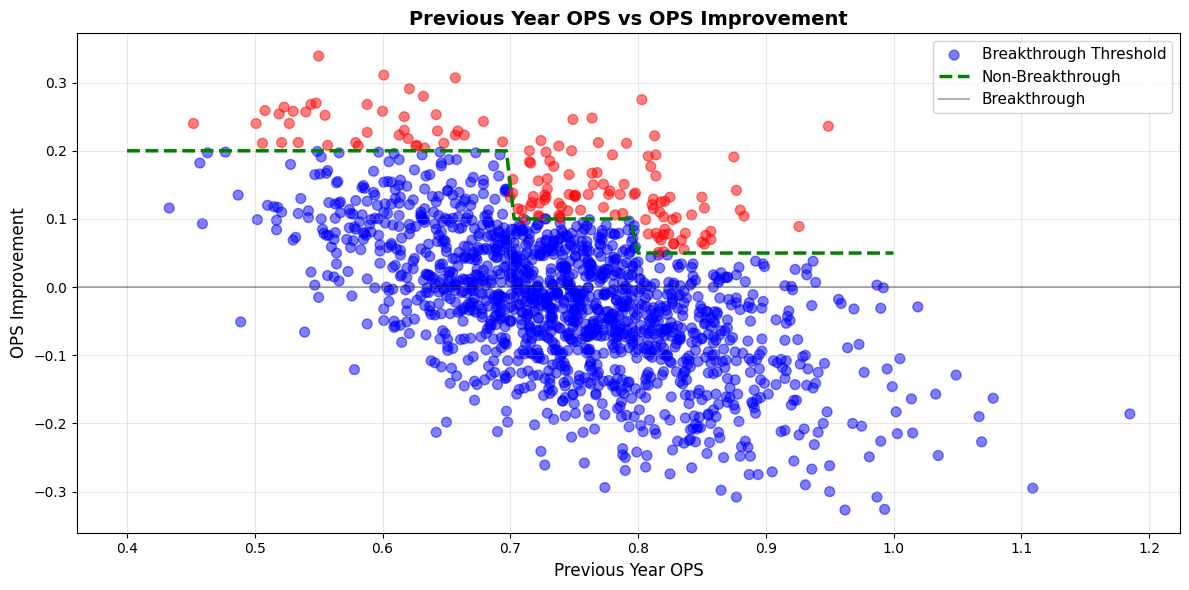

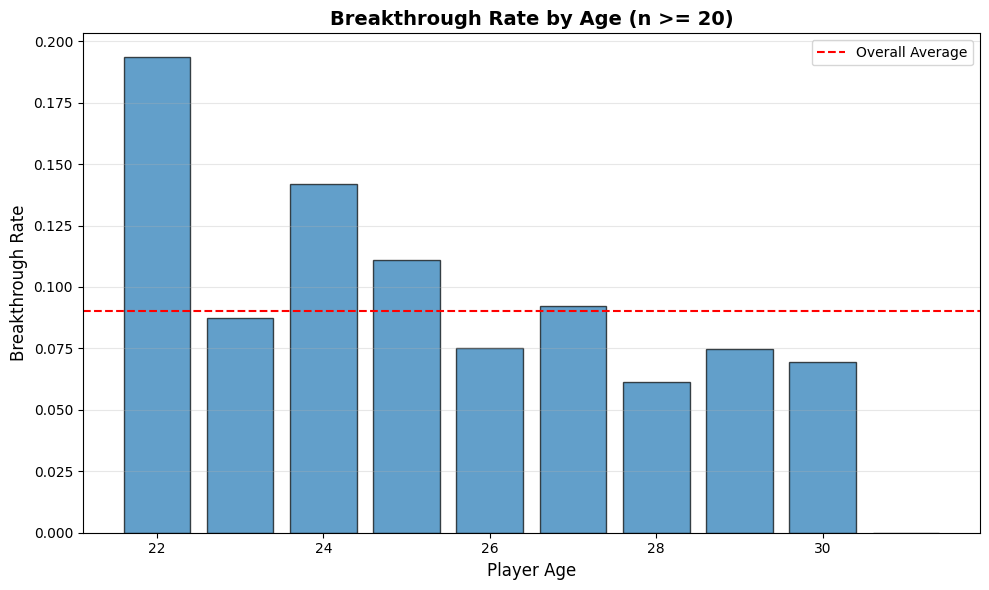

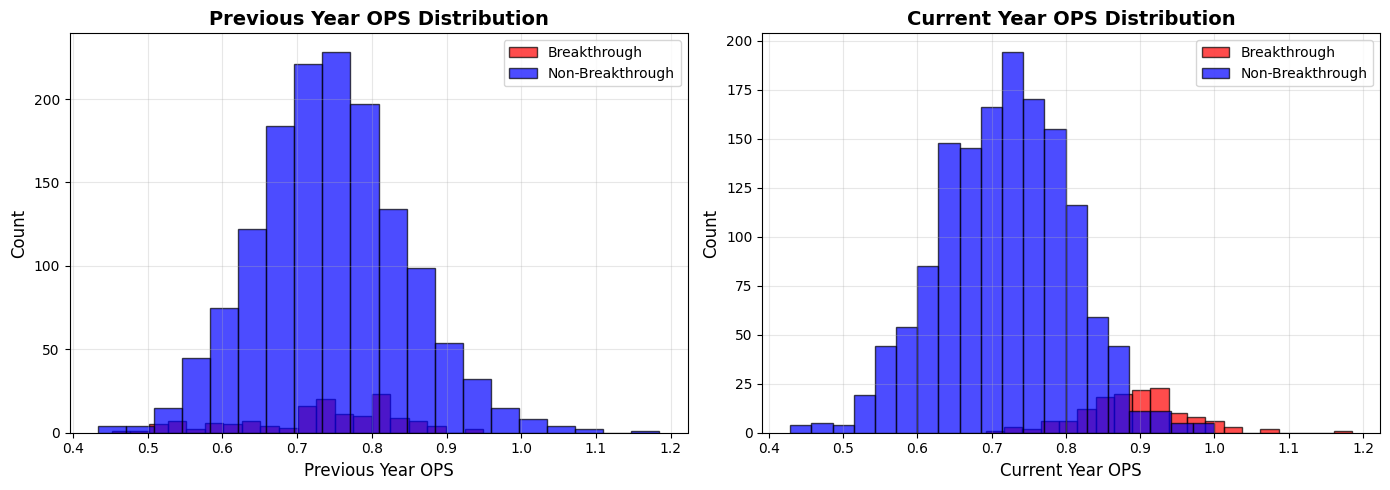

✅ All visualizations completed!


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


df_model = pd.read_csv("breakthrough_labeled_data.csv")

# 1. Breakthrough Year Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1.1 Overall Distribution
axes[0, 0].bar(['Non-Breakthrough', 'Breakthrough'], df_model['breakthrough'].value_counts().sort_index())
axes[0, 0].set_title('Breakthrough Year Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Count')
for i, v in enumerate(df_model['breakthrough'].value_counts().sort_index()):
    axes[0, 0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# 1.2 Breakthrough Rate by OPS Group
group_stats = df_model.groupby('ops_group')['breakthrough'].mean()
axes[0, 1].bar(range(len(group_stats)), group_stats.values)
axes[0, 1].set_xticks(range(len(group_stats)))
axes[0, 1].set_xticklabels(['< 0.7', '0.7-0.8', '>= 0.8'], rotation=45)
axes[0, 1].set_title('Breakthrough Rate by Previous OPS Group', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Breakthrough Rate')
axes[0, 1].axhline(y=df_model['breakthrough'].mean(), color='r', linestyle='--', label='Overall Average')
axes[0, 1].legend()

# 1.3 Breakthrough Rate by MLB Years
mlb_years_stats = df_model.groupby('mlb_years')['breakthrough'].mean()
axes[1, 0].plot(mlb_years_stats.index, mlb_years_stats.values, marker='o', linewidth=2)
axes[1, 0].set_title('Breakthrough Rate by MLB Years', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('MLB Years')
axes[1, 0].set_ylabel('Breakthrough Rate')
axes[1, 0].grid(alpha=0.3)

# 1.4 OPS Improvement Distribution
axes[1, 1].hist(df_model[df_model['breakthrough']==1]['ops_improvement'],
                bins=30, alpha=0.7, label='Breakthrough', edgecolor='black', color='red')
axes[1, 1].hist(df_model[df_model['breakthrough']==0]['ops_improvement'],
                bins=30, alpha=0.7, label='Non-Breakthrough', edgecolor='black', color='blue')
axes[1, 1].set_title('OPS Improvement Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('OPS Improvement')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend()
axes[1, 1].axvline(x=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 2. Previous OPS vs OPS Improvement Scatter Plot
plt.figure(figsize=(12, 6))
colors = df_model['breakthrough'].map({0: 'blue', 1: 'red'})
plt.scatter(df_model['ops_prev'], df_model['ops_improvement'],
            c=colors, alpha=0.5, s=50)

# Draw breakthrough threshold lines
x = np.linspace(0.4, 1.0, 100)
y1 = np.where(x < 0.7, 0.2, np.where(x < 0.8, 0.1, 0.05))
plt.plot(x, y1, 'g--', linewidth=2.5, label='Breakthrough Threshold')

plt.xlabel('Previous Year OPS', fontsize=12)
plt.ylabel('OPS Improvement', fontsize=12)
plt.title('Previous Year OPS vs OPS Improvement', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.legend(['Breakthrough Threshold', 'Non-Breakthrough', 'Breakthrough'], fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Breakthrough Rate by Age
plt.figure(figsize=(10, 6))
age_stats = df_model.groupby('player_age')['breakthrough'].agg(['count', 'mean'])
age_stats = age_stats[age_stats['count'] >= 20]  # Filter ages with enough samples

plt.bar(age_stats.index, age_stats['mean'], alpha=0.7, edgecolor='black')
plt.xlabel('Player Age', fontsize=12)
plt.ylabel('Breakthrough Rate', fontsize=12)
plt.title('Breakthrough Rate by Age (n >= 20)', fontsize=14, fontweight='bold')
plt.axhline(y=df_model['breakthrough'].mean(), color='r', linestyle='--', label='Overall Average')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. OPS Distribution: Breakthrough vs Non-Breakthrough
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Previous Year OPS
axes[0].hist(df_model[df_model['breakthrough']==1]['ops_prev'],
             bins=20, alpha=0.7, label='Breakthrough', edgecolor='black', color='red')
axes[0].hist(df_model[df_model['breakthrough']==0]['ops_prev'],
             bins=20, alpha=0.7, label='Non-Breakthrough', edgecolor='black', color='blue')
axes[0].set_xlabel('Previous Year OPS', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Previous Year OPS Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Current Year OPS
axes[1].hist(df_model[df_model['breakthrough']==1]['on_base_plus_slg'],
             bins=20, alpha=0.7, label='Breakthrough', edgecolor='black', color='red')
axes[1].hist(df_model[df_model['breakthrough']==0]['on_base_plus_slg'],
             bins=20, alpha=0.7, label='Non-Breakthrough', edgecolor='black', color='blue')
axes[1].set_xlabel('Current Year OPS', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Current Year OPS Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ All visualizations completed!")

分析樣本數: 1587

Pearson 相關係數矩陣:
                    barrel_batted_rate  exit_velocity_avg  pull_percent
barrel_batted_rate            1.000000           0.747942      0.341559
exit_velocity_avg             0.747942           1.000000      0.139001
pull_percent                  0.341559           0.139001      1.000000


各變數之間的相關性分析:
Barrel Rate vs Exit Velocity:
  相關係數 r = 0.7479
  p-value = 0.000000 ***

Barrel Rate vs Pull%:
  相關係數 r = 0.3416
  p-value = 0.000000 ***

Exit Velocity vs Pull%:
  相關係數 r = 0.1390
  p-value = 0.000000 ***

描述性統計:
       barrel_batted_rate  exit_velocity_avg  pull_percent
count         1587.000000        1587.000000   1587.000000
mean             7.689918          88.696093     37.548267
std              4.152384           2.248558      5.993009
min              0.000000          80.500000     16.700000
25%              4.600000          87.200000     33.600000
50%              7.400000          88.800000     37.500000
75%             10.300000          90.20

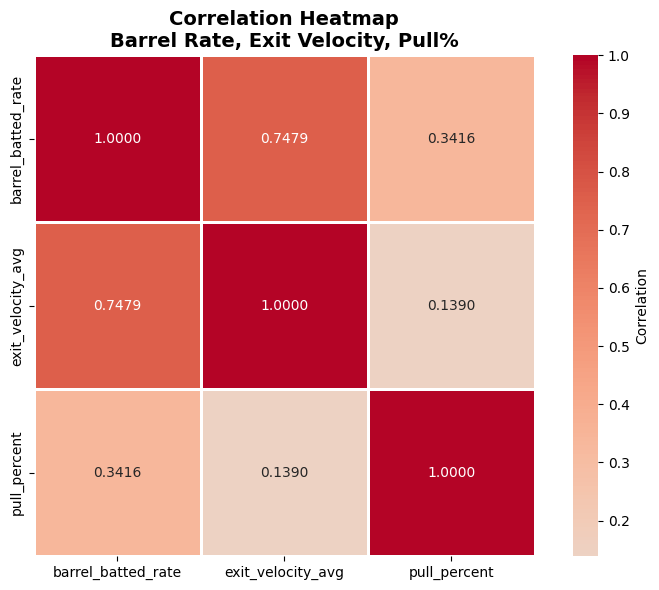

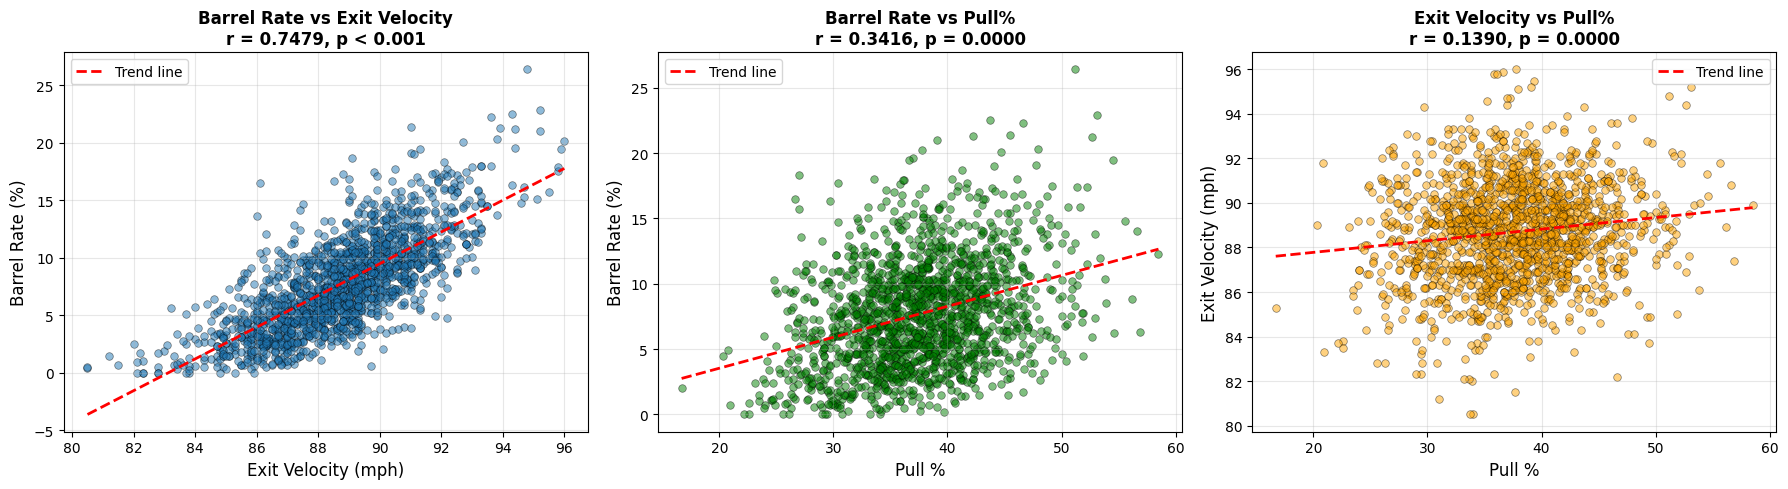

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 選擇要分析的三個變數
variables = ['barrel_batted_rate', 'exit_velocity_avg', 'pull_percent']

# 移除缺失值
df_clean = df_model[variables].dropna()

print(f"分析樣本數: {len(df_clean)}\n")

# 計算相關係數矩陣 (Pearson)
correlation_matrix = df_clean.corr()

print("=" * 60)
print("Pearson 相關係數矩陣:")
print("=" * 60)
print(correlation_matrix)
print("\n")

# 顯示具體的相關性及顯著性
print("=" * 60)
print("各變數之間的相關性分析:")
print("=" * 60)

# Barrel Rate vs Exit Velocity
r1, p1 = stats.pearsonr(df_clean['barrel_batted_rate'], df_clean['exit_velocity_avg'])
print(f"Barrel Rate vs Exit Velocity:")
print(f"  相關係數 r = {r1:.4f}")
print(f"  p-value = {p1:.6f} {'***' if p1 < 0.001 else '**' if p1 < 0.01 else '*' if p1 < 0.05 else '(不顯著)'}")
print()

# Barrel Rate vs Pull%
r2, p2 = stats.pearsonr(df_clean['barrel_batted_rate'], df_clean['pull_percent'])
print(f"Barrel Rate vs Pull%:")
print(f"  相關係數 r = {r2:.4f}")
print(f"  p-value = {p2:.6f} {'***' if p2 < 0.001 else '**' if p2 < 0.01 else '*' if p2 < 0.05 else '(不顯著)'}")
print()

# Exit Velocity vs Pull%
r3, p3 = stats.pearsonr(df_clean['exit_velocity_avg'], df_clean['pull_percent'])
print(f"Exit Velocity vs Pull%:")
print(f"  相關係數 r = {r3:.4f}")
print(f"  p-value = {p3:.6f} {'***' if p3 < 0.001 else '**' if p3 < 0.01 else '*' if p3 < 0.05 else '(不顯著)'}")
print()

# 描述性統計
print("=" * 60)
print("描述性統計:")
print("=" * 60)
print(df_clean.describe())

# 視覺化 1: 相關性熱圖
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.4f', square=True, linewidths=2, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap\nBarrel Rate, Exit Velocity, Pull%', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 視覺化 2: 散點圖矩陣
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Barrel Rate vs Exit Velocity
axes[0].scatter(df_clean['exit_velocity_avg'], df_clean['barrel_batted_rate'],
                alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Exit Velocity (mph)', fontsize=12)
axes[0].set_ylabel('Barrel Rate (%)', fontsize=12)
axes[0].set_title(f'Barrel Rate vs Exit Velocity\nr = {r1:.4f}, p < 0.001', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 添加趨勢線
z1 = np.polyfit(df_clean['exit_velocity_avg'], df_clean['barrel_batted_rate'], 1)
p1_line = np.poly1d(z1)
axes[0].plot(df_clean['exit_velocity_avg'].sort_values(),
             p1_line(df_clean['exit_velocity_avg'].sort_values()),
             "r--", linewidth=2, label='Trend line')
axes[0].legend()

# Barrel Rate vs Pull%
axes[1].scatter(df_clean['pull_percent'], df_clean['barrel_batted_rate'],
                alpha=0.5, s=30, color='green', edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Pull %', fontsize=12)
axes[1].set_ylabel('Barrel Rate (%)', fontsize=12)
axes[1].set_title(f'Barrel Rate vs Pull%\nr = {r2:.4f}, p = {p2:.4f}', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# 添加趨勢線
z2 = np.polyfit(df_clean['pull_percent'], df_clean['barrel_batted_rate'], 1)
p2_line = np.poly1d(z2)
axes[1].plot(df_clean['pull_percent'].sort_values(),
             p2_line(df_clean['pull_percent'].sort_values()),
             "r--", linewidth=2, label='Trend line')
axes[1].legend()

# Exit Velocity vs Pull%
axes[2].scatter(df_clean['pull_percent'], df_clean['exit_velocity_avg'],
                alpha=0.5, s=30, color='orange', edgecolors='black', linewidth=0.5)
axes[2].set_xlabel('Pull %', fontsize=12)
axes[2].set_ylabel('Exit Velocity (mph)', fontsize=12)
axes[2].set_title(f'Exit Velocity vs Pull%\nr = {r3:.4f}, p = {p3:.4f}', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

# 添加趨勢線
z3 = np.polyfit(df_clean['pull_percent'], df_clean['exit_velocity_avg'], 1)
p3_line = np.poly1d(z3)
axes[2].plot(df_clean['pull_percent'].sort_values(),
             p3_line(df_clean['pull_percent'].sort_values()),
             "r--", linewidth=2, label='Trend line')
axes[2].legend()

plt.tight_layout()
plt.show()

FEATURE AVAILABILITY CHECK
✅ Available features: 56/56

TRAIN/TEST SPLIT BY YEAR

訓練集年份範圍: 2016 - 2024
測試集年份: 2025

年份分佈:
year
2016    152
2017    159
2018    172
2019    170
2020     98
2021    145
2022    162
2023    166
2024    185
2025    178
Name: count, dtype: int64

訓練集: 1409 筆 (突破率: 9.30%)
測試集: 178 筆 (突破率: 6.74%)
  - 2025 年球員數: 178

缺失值檢查:
發現缺失值:
                     Train  Test
avg_swing_speed       1060     0
fast_swing_rate       1060     0
avg_swing_length      1060     0
attack_angle          1060     0
ideal_angle_rate      1060     0
vertical_swing_path   1060     0
blasts_contact        1060     0
blasts_swing          1060     0
squared_up_contact    1060     0
squared_up_swing      1060     0

使用訓練集中位數填補...

TRAINING XGBOOST MODEL
類別權重 (處理不平衡): 9.76
[0]	validation_0-logloss:0.65163


/tmp/ipython-input-3203490630.py:135: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_val, inplace=True)
/tmp/ipython-input-3203490630.py:136: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

[50]	validation_0-logloss:0.26401
[100]	validation_0-logloss:0.23288
[150]	validation_0-logloss:0.23427
[164]	validation_0-logloss:0.23077
✅ 訓練完成!

MODEL EVALUATION

📊 Training Set (2015-2024):
                  precision    recall  f1-score   support

Non-Breakthrough       1.00      1.00      1.00      1278
    Breakthrough       0.99      1.00      1.00       131

        accuracy                           1.00      1409
       macro avg       1.00      1.00      1.00      1409
    weighted avg       1.00      1.00      1.00      1409


📊 Test Set (2025):
                  precision    recall  f1-score   support

Non-Breakthrough       0.94      0.98      0.96       166
    Breakthrough       0.33      0.17      0.22        12

        accuracy                           0.92       178
       macro avg       0.64      0.57      0.59       178
    weighted avg       0.90      0.92      0.91       178


🎯 Test ROC-AUC Score: 0.8173

📋 Confusion Matrix (2025 Test Set):
[[162   4]
 [ 10 

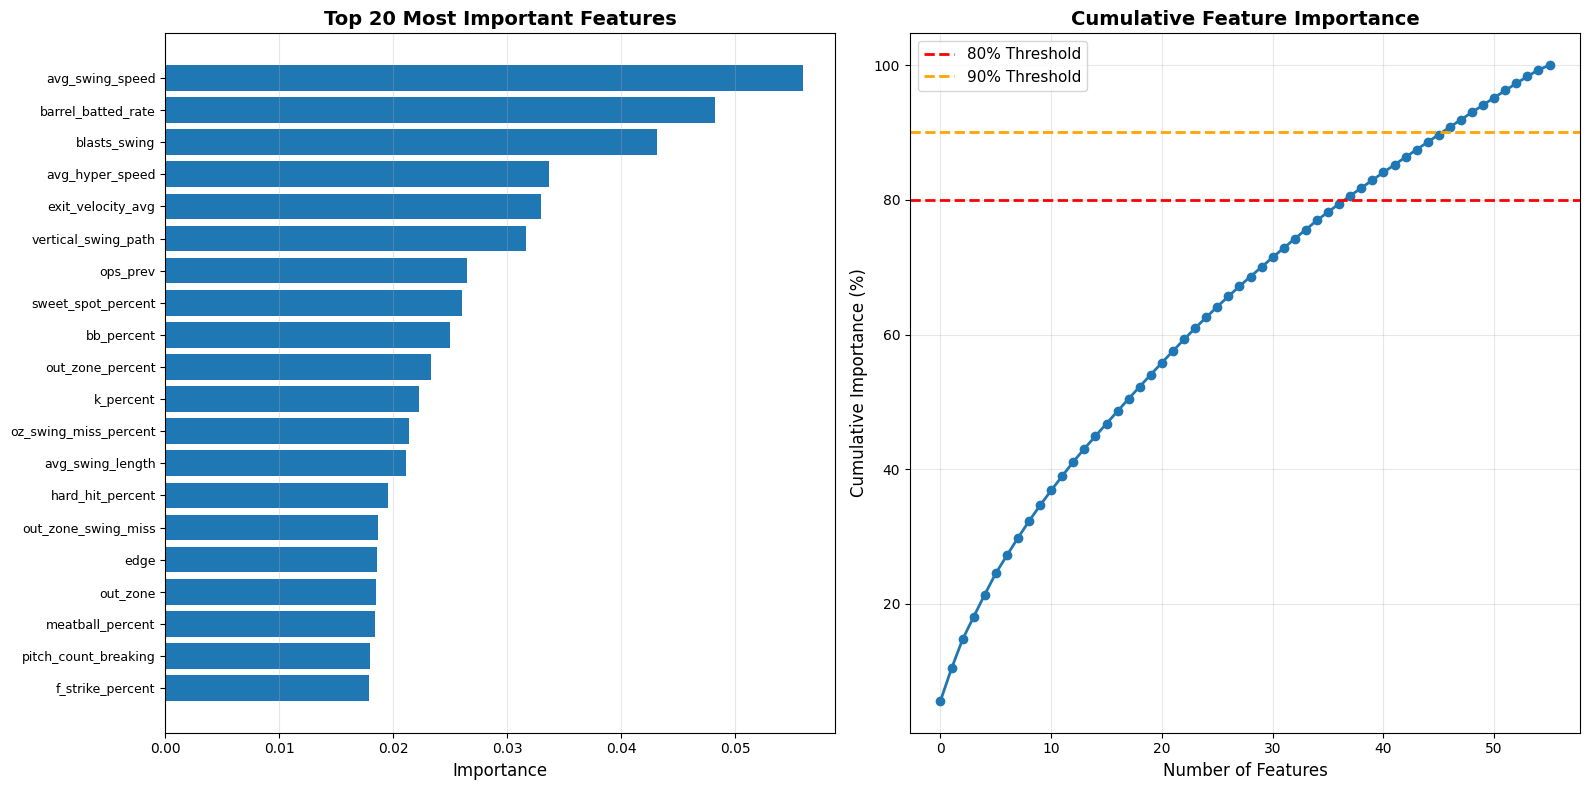


📊 前 38 個特徵可解釋 80% 的重要性
📊 前 47 個特徵可解釋 90% 的重要性

🔑 最關鍵的 10 個特徵:
  avg_swing_speed                 5.60%
  barrel_batted_rate              4.83%
  blasts_swing                    4.31%
  avg_hyper_speed                 3.36%
  exit_velocity_avg               3.30%
  vertical_swing_path             3.16%
  ops_prev                        2.64%
  sweet_spot_percent              2.60%
  bb_percent                      2.50%
  out_zone_percent                2.33%

✅ 結果已儲存:
  - feature_importance_breakthrough.csv
  - 2025_predictions.csv


In [12]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

df_model = pd.read_csv("breakthrough_labeled_data.csv")

# 1. 準備特徵 - Quality of Contact + Pitches & Location
advanced_features = [
    # === Quality of Contact ===
    'exit_velocity_avg',           # Avg EV
    'launch_angle_avg',            # Avg LA
    'sweet_spot_percent',          # LA Sweet-Spot %
    'barrel_batted_rate',          # Barrel%
    'solidcontact_percent',        # Solid Contact %
    'flareburner_percent',         # Flare/Burner %
    'poorlyunder_percent',         # Under %
    'poorlytopped_percent',        # Topped %
    'poorlyweak_percent',          # Poor/Weak %
    'hard_hit_percent',            # Hard Hit %
    'avg_best_speed',              # EV50
    'avg_hyper_speed',             # Adjusted EV

    # === Pitches & Location ===
    'z_swing_percent',             # Zone Swing %
    'z_swing_miss_percent',        # Zone Swing & Miss %
    'oz_swing_percent',            # Out of Zone Swing %
    'oz_swing_miss_percent',       # Out of Zone Swing & Miss %
    'oz_contact_percent',          # Out of Zone Contact %
    'out_zone_swing_miss',         # Out of Zone Swing & Miss
    'out_zone_swing',              # Out of Zone Swings
    'out_zone_percent',            # Out of Zone %
    'out_zone',                    # Out of Zone
    'meatball_swing_percent',      # Meatball Swing %
    'meatball_percent',            # Meatball %
    'pitch_count_offspeed',        # # Offspeed
    'pitch_count_fastball',        # # Fastball
    'pitch_count_breaking',        # # Breaking
    'iz_contact_percent',          # In Zone Contact %
    'in_zone_swing_miss',          # In Zone Swing & Miss
    'in_zone_swing',               # In Zone Swings
    'in_zone_percent',             # In Zone %
    'in_zone',                     # In Zone
    'edge_percent',                # Edge %
    'edge',                        # Edge
    'whiff_percent',               # Whiff %
    'swing_percent',               # Swing %
    'pull_percent',                # Pull %
    'straightaway_percent',        # Straight Away %
    'opposite_percent',            # Oppo %
    'batted_ball',                 # Batted Balls
    'f_strike_percent',            # First Strike %
    'groundballs_percent',         # GB%

    # # === Bat Tracking ===
    'avg_swing_speed',             # 揮棒速度
    'fast_swing_rate',             # 快速揮棒比例
    'avg_swing_length',            # 揮棒長度
    'attack_angle',                # 攻擊角度
    'ideal_angle_rate',            # 理想角度率
    'vertical_swing_path',         # 垂直揮棒路徑
    'blasts_contact',              # 強勁擊球/接觸
    'blasts_swing',                # 強勁擊球/揮棒
    'squared_up_contact',          # 紮實擊球/接觸
    'squared_up_swing',            # 紮實擊球/揮棒

    # === 基本選球數據 ===
    'k_percent',                   # 三振率
    'bb_percent',                  # 保送率

    # === 球員狀態 ===
    'player_age',                  # 年齡
    'mlb_years',                   # 年資
    'ops_prev'                     # 前一年OPS
]

# 2. 檢查特徵可用性
available_features = [f for f in advanced_features if f in df_model.columns]
missing_features = set(advanced_features) - set(available_features)

print("="*70)
print("FEATURE AVAILABILITY CHECK")
print("="*70)
print(f"✅ Available features: {len(available_features)}/{len(advanced_features)}")
if missing_features:
    print(f"\n⚠️  Missing features ({len(missing_features)}):")
    for f in sorted(missing_features):
        print(f"  - {f}")

# 3. 按年份分割訓練集和測試集
print("\n" + "="*70)
print("TRAIN/TEST SPLIT BY YEAR")
print("="*70)

# 訓練集: 2025 之前的所有年份
train_data = df_model[df_model['year'] < 2025].copy()
# 測試集: 2025 年
test_data = df_model[df_model['year'] == 2025].copy()

print(f"\n訓練集年份範圍: {train_data['year'].min()} - {train_data['year'].max()}")
print(f"測試集年份: 2025")

print(f"\n年份分佈:")
print(df_model['year'].value_counts().sort_index())

# 準備 X, y
X_train = train_data[available_features].copy()
y_train = train_data['breakthrough'].copy()

X_test = test_data[available_features].copy()
y_test = test_data['breakthrough'].copy()

print(f"\n訓練集: {len(X_train)} 筆 (突破率: {y_train.mean():.2%})")
print(f"測試集: {len(X_test)} 筆 (突破率: {y_test.mean():.2%})")
print(f"  - 2025 年球員數: {test_data['player_id'].nunique()}")

# 4. 檢查缺失值
print(f"\n缺失值檢查:")
missing_train = X_train.isnull().sum()
missing_test = X_test.isnull().sum()

if missing_train.sum() > 0 or missing_test.sum() > 0:
    print("發現缺失值:")
    all_missing = pd.DataFrame({
        'Train': missing_train,
        'Test': missing_test
    })
    print(all_missing[all_missing.sum(axis=1) > 0])

    print("\n使用訓練集中位數填補...")
    # 用訓練集的中位數填補
    for col in available_features:
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        X_test[col].fillna(median_val, inplace=True)
else:
    print("✅ 無缺失值")

# 5. 訓練 XGBoost 分類模型
print("\n" + "="*70)
print("TRAINING XGBOOST MODEL")
print("="*70)

# 計算類別權重
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"類別權重 (處理不平衡): {scale_pos_weight:.2f}")

model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss',
    early_stopping_rounds=50,
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # 注意是 list of tuple
    verbose=50,
)


print("✅ 訓練完成!")

# 6. 預測
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

# 7. 評估模型
print("\n" + "="*70)
print("MODEL EVALUATION")
print("="*70)

print("\n📊 Training Set (2015-2024):")
print(classification_report(y_train, y_train_pred,
                          target_names=['Non-Breakthrough', 'Breakthrough']))

print("\n📊 Test Set (2025):")
print(classification_report(y_test, y_test_pred,
                          target_names=['Non-Breakthrough', 'Breakthrough']))

print(f"\n🎯 Test ROC-AUC Score: {roc_auc_score(y_test, y_test_proba):.4f}")

# 8. 混淆矩陣
print("\n📋 Confusion Matrix (2025 Test Set):")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]:3d} | False Positives: {cm[0,1]:3d}")
print(f"False Negatives: {cm[1,0]:3d} | True Positives:  {cm[1,1]:3d}")

# 計算準確率
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print(f"\nAccuracy: {accuracy:.2%}")

# 9. 查看 2025 年的預測結果
print("\n" + "="*70)
print("2025 PREDICTIONS")
print("="*70)

test_results = test_data[['last_name, first_name', 'player_age', 'mlb_years',
                          'ops_prev', 'on_base_plus_slg', 'breakthrough']].copy()
test_results['predicted'] = y_test_pred
test_results['prob_breakthrough'] = y_test_proba

print("\n🔮 預測會突破的球員 (Top 10 by probability):")
predicted_breakthrough = test_results[test_results['predicted'] == 1].sort_values('prob_breakthrough', ascending=False)
print(predicted_breakthrough.head(10).to_string(index=False))

print("\n✅ 實際突破且預測正確 (True Positives):")
true_positives = test_results[(test_results['breakthrough'] == 1) & (test_results['predicted'] == 1)]
print(true_positives.sort_values('prob_breakthrough', ascending=False).to_string(index=False))

print("\n❌ 實際突破但預測錯誤 (False Negatives):")
false_negatives = test_results[(test_results['breakthrough'] == 1) & (test_results['predicted'] == 0)]
print(false_negatives.sort_values('prob_breakthrough', ascending=False).to_string(index=False))

print("\n⚠️  預測突破但實際沒有 (False Positives):")
false_positives = test_results[(test_results['breakthrough'] == 0) & (test_results['predicted'] == 1)]
print(false_positives.sort_values('prob_breakthrough', ascending=False).to_string(index=False))

# 10. 特徵重要性分析
print("\n" + "="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)

feature_importance = pd.DataFrame({
    'feature': available_features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

feature_importance['importance_pct'] = (feature_importance['importance'] /
                                        feature_importance['importance'].sum() * 100)
feature_importance['cumulative_pct'] = feature_importance['importance_pct'].cumsum()

print("\nTop 20 Most Important Features:")
print(feature_importance.head(20).to_string(index=False))

# 11. 視覺化特徵重要性
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 11.1 Top 20 特徵
top_features = feature_importance.head(20)
axes[0].barh(range(len(top_features)), top_features['importance'])
axes[0].set_yticks(range(len(top_features)))
axes[0].set_yticklabels(top_features['feature'], fontsize=9)
axes[0].invert_yaxis()
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].set_title('Top 20 Most Important Features', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# 11.2 累積重要性
cumulative = feature_importance['cumulative_pct'].values
axes[1].plot(range(len(cumulative)), cumulative, marker='o', linewidth=2)
axes[1].axhline(y=80, color='r', linestyle='--', linewidth=2, label='80% Threshold')
axes[1].axhline(y=90, color='orange', linestyle='--', linewidth=2, label='90% Threshold')
axes[1].set_xlabel('Number of Features', fontsize=12)
axes[1].set_ylabel('Cumulative Importance (%)', fontsize=12)
axes[1].set_title('Cumulative Feature Importance', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 12. 關鍵統計
features_for_80 = (feature_importance['cumulative_pct'] <= 80).sum() + 1
features_for_90 = (feature_importance['cumulative_pct'] <= 90).sum() + 1

print(f"\n📊 前 {features_for_80} 個特徵可解釋 80% 的重要性")
print(f"📊 前 {features_for_90} 個特徵可解釋 90% 的重要性")

print("\n🔑 最關鍵的 10 個特徵:")
for i, row in feature_importance.head(10).iterrows():
    print(f"  {row['feature']:30s} {row['importance_pct']:5.2f}%")

# 13. 儲存結果
feature_importance.to_csv('feature_importance_breakthrough.csv', index=False)
test_results.to_csv('2025_predictions.csv', index=False)

print("\n✅ 結果已儲存:")
print("  - feature_importance_breakthrough.csv")
print("  - 2025_predictions.csv")

In [5]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.3 MB/s eta 0:00:00


In [14]:
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd



# 1. SMOTE 過採樣
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"原始: 突破 {y_train.sum()}/{len(y_train)} = {y_train.mean():.2%}")
print(f"SMOTE後: 突破 {y_train_resampled.sum()}/{len(y_train_resampled)} = {y_train_resampled.mean():.2%}")


# # 2. 訓練 XGBoost (不需要 scale_pos_weight)
# xgboost = xgb.XGBClassifier(
#     n_estimators=700,
#     max_depth=5,
#     learning_rate=0.01,
#     min_child_weight=3,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42,
#     eval_metric='logloss',
#     early_stopping_rounds=50,
# )


# xgboost.fit(
#     X_train, y_train,
#     eval_set=[(X_test, y_test)],  # 注意是 list of tuple
#     verbose=50
# )


# 計算類別權重
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"類別權重: {scale_pos_weight:.2f}")

# 訓練 CatBoost
model_catboost = CatBoostClassifier(
    iterations=100,              # 相當於 n_estimators
    depth=5,                     # 相當於 max_depth
    learning_rate=0.01,
    loss_function='Logloss',     # 二元分類
    eval_metric='AUC',           # 評估指標
    scale_pos_weight=scale_pos_weight,  # 處理不平衡
    random_seed=42,
    verbose=50,                  # 每 50 輪顯示一次
    early_stopping_rounds=50     # Early stopping
)

print("\n開始訓練 CatBoost...")
model_catboost.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True          # 使用最佳模型
)

# model_lgb = lgb.LGBMClassifier(
#     n_estimators=200,              # 樹的數量
#     max_depth=5,                   # 樹的深度
#     learning_rate=0.01,             # 學習率
#     num_leaves=31,                 # 葉子數量 (LightGBM 特有)
#     min_child_samples=20,          # 相當於 min_child_weight
#     subsample=0.8,                 # 行採樣
#     colsample_bytree=0.8,          # 列採樣
#     scale_pos_weight=scale_pos_weight,  # 處理不平衡
#     random_state=42,
#     verbose=-1,                    # -1 不顯示警告
#     force_col_wise=True            # 避免警告訊息
# )

# print("\n開始訓練 LightGBM...")
# model_lgb.fit(
#     X_train, y_train,
#     eval_set=[(X_train, y_train), (X_test, y_test)],
#     eval_metric='auc',
#     callbacks=[lgb.log_evaluation(period=50)]  # 每 50 輪顯示
# )

# print(f"✅ 訓練完成! 最佳迭代: {model_lgb.best_iteration_}")

# model_rf = RandomForestClassifier(
#     n_estimators=300,              # 樹的數量
#     max_depth=10,                  # 樹的最大深度
#     min_samples_split=10,          # 分裂所需最小樣本數
#     min_samples_leaf=5,            # 葉節點最小樣本數
#     max_features='sqrt',           # 每次分裂考慮的特徵數 (sqrt = 特徵數開根號)
#     class_weight='balanced',       # 自動處理類別不平衡
#     random_state=42,
#     n_jobs=-1,                     # 使用所有 CPU 核心
#     verbose=1                      # 顯示訓練進度
# )

# print("\n開始訓練 Random Forest...")
# model_rf.fit(X_train_resampled, y_train_resampled)

# print(f"✅ 訓練完成!")



# 預測
y_train_pred = model_catboost.predict(X_train)
y_test_pred = model_catboost.predict(X_test)

y_train_proba = model_catboost.predict_proba(X_train)[:, 1]
y_test_proba = model_catboost.predict_proba(X_test)[:, 1]



# y_train_proba = (xgboost.predict_proba(X_train)[:, 1] +
#                  model_catboost.predict_proba(X_train)[:, 1]) / 2
# y_test_proba = (xgboost.predict_proba(X_test)[:, 1] +
#                 model_catboost.predict_proba(X_test)[:, 1]) / 2

# 轉成 0/1
# y_train_pred = (y_train_proba >= 0.5).astype(int)
# y_test_pred = (y_test_proba >= 0.5).astype(int)


# 7. 評估模型
print("\n" + "="*70)
print("MODEL EVALUATION")
print("="*70)

print("\n📊 Training Set (2015-2024):")
print(classification_report(y_train, y_train_pred,
                          target_names=['Non-Breakthrough', 'Breakthrough']))

print("\n📊 Test Set (2025):")
print(classification_report(y_test, y_test_pred,
                          target_names=['Non-Breakthrough', 'Breakthrough']))

print(f"\n🎯 Test ROC-AUC Score: {roc_auc_score(y_test, y_test_proba):.4f}")

# 8. 混淆矩陣
print("\n📋 Confusion Matrix (2025 Test Set):")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]:3d} | False Positives: {cm[0,1]:3d}")
print(f"False Negatives: {cm[1,0]:3d} | True Positives:  {cm[1,1]:3d}")

# 計算準確率
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print(f"\nAccuracy: {accuracy:.2%}")




原始: 突破 131.0/1409 = 9.30%
SMOTE後: 突破 1278.0/2556 = 50.00%
類別權重: 9.76

開始訓練 CatBoost...
0:	test: 0.6435743	best: 0.6435743 (0)	total: 34.1ms	remaining: 3.38s
50:	test: 0.7515060	best: 0.7555221 (48)	total: 1.31s	remaining: 1.26s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7555220884
bestIteration = 48

Shrink model to first 49 iterations.

MODEL EVALUATION

📊 Training Set (2015-2024):
                  precision    recall  f1-score   support

Non-Breakthrough       0.98      0.74      0.85      1278
    Breakthrough       0.26      0.87      0.40       131

        accuracy                           0.76      1409
       macro avg       0.62      0.81      0.62      1409
    weighted avg       0.92      0.76      0.81      1409


📊 Test Set (2025):
                  precision    recall  f1-score   support

Non-Breakthrough       0.96      0.64      0.77       166
    Breakthrough       0.12      0.67      0.20        12

        accuracy                          


2025 PREDICTIONS

🔮 預測會突破的球員 (Top 10 by probability):
last_name, first_name  player_age  mlb_years  ops_prev  on_base_plus_slg  breakthrough  predicted  prob_breakthrough
            Rice, Ben          26        2.0     0.613             0.836           1.0        1.0           0.744603
     Canzone, Dominic          27        3.0     0.652             0.839           0.0        1.0           0.718935
            Adell, Jo          26        6.0     0.682             0.778           0.0        1.0           0.711143
      Carroll, Corbin          24        4.0     0.750             0.884           1.0        1.0           0.708151
   Morel, Christopher          26        4.0     0.634             0.685           0.0        1.0           0.701652
 Crow-Armstrong, Pete          23        3.0     0.670             0.768           0.0        1.0           0.693761
       Moniak, Mickey          27        6.0     0.646             0.824           0.0        1.0           0.689871
         

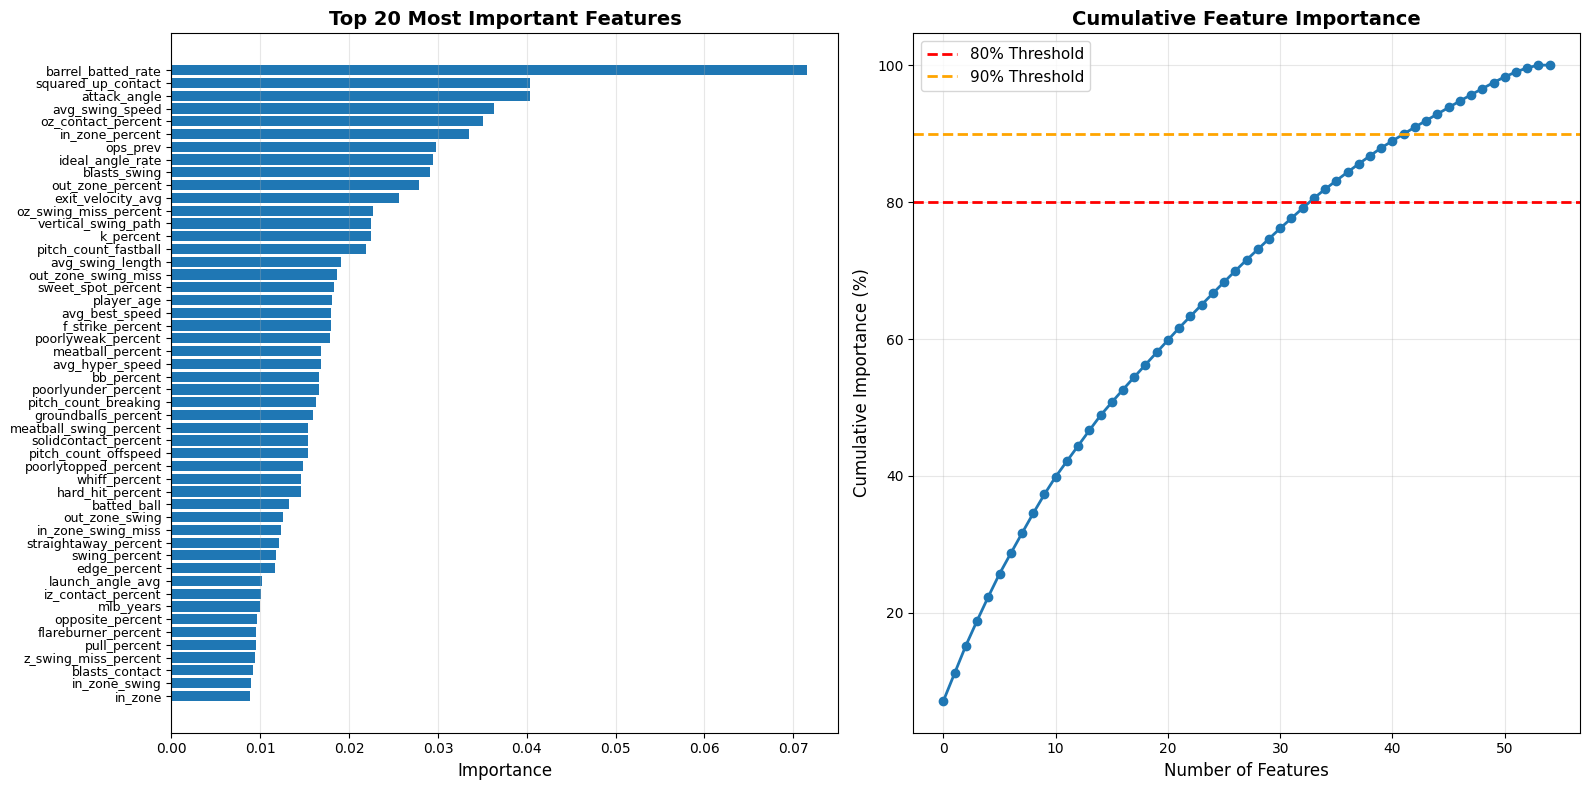


📊 前 34 個特徵可解釋 80% 的重要性
📊 前 43 個特徵可解釋 90% 的重要性

🔑 最關鍵的 10 個特徵:
  barrel_batted_rate              7.15%
  squared_up_contact              4.04%
  attack_angle                    4.03%
  avg_swing_speed                 3.63%
  oz_contact_percent              3.51%
  in_zone_percent                 3.35%
  ops_prev                        2.98%
  ideal_angle_rate                2.94%
  blasts_swing                    2.91%
  out_zone_percent                2.78%


In [ ]:
# 9. 查看 2025 年的預測結果
print("\n" + "="*70)
print("2025 PREDICTIONS")
print("="*70)

test_results = test_data[['last_name, first_name', 'player_age', 'mlb_years',
                          'ops_prev', 'on_base_plus_slg', 'breakthrough']].copy()
test_results['predicted'] = y_test_pred
test_results['prob_breakthrough'] = y_test_proba

print("\n🔮 預測會突破的球員 (Top 10 by probability):")
predicted_breakthrough = test_results[test_results['predicted'] == 1].sort_values('prob_breakthrough', ascending=False)
print(predicted_breakthrough.head(10).to_string(index=False))

print("\n✅ 實際突破且預測正確 (True Positives):")
true_positives = test_results[(test_results['breakthrough'] == 1) & (test_results['predicted'] == 1)]
print(true_positives.sort_values('prob_breakthrough', ascending=False).to_string(index=False))

print("\n❌ 實際突破但預測錯誤 (False Negatives):")
false_negatives = test_results[(test_results['breakthrough'] == 1) & (test_results['predicted'] == 0)]
print(false_negatives.sort_values('prob_breakthrough', ascending=False).to_string(index=False))

print("\n⚠️  預測突破但實際沒有 (False Positives):")
false_positives = test_results[(test_results['breakthrough'] == 0) & (test_results['predicted'] == 1)]
print(false_positives.sort_values('prob_breakthrough', ascending=False).to_string(index=False))

# 10. 特徵重要性分析
print("\n" + "="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)

feature_importance = pd.DataFrame({
    'feature': available_features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

feature_importance['importance_pct'] = (feature_importance['importance'] /
                                        feature_importance['importance'].sum() * 100)
feature_importance['cumulative_pct'] = feature_importance['importance_pct'].cumsum()

print("\n" + "="*70)
print("ALL FEATURES (完整清單)")
print("="*70)
print(f"總特徵數: {len(feature_importance)}")
print("\n全部特徵重要性:")
print(feature_importance.to_string(index=False))
# 11. 視覺化特徵重要性
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 11.1 Top 20 特徵
top_features = feature_importance.head(50)
axes[0].barh(range(len(top_features)), top_features['importance'])
axes[0].set_yticks(range(len(top_features)))
axes[0].set_yticklabels(top_features['feature'], fontsize=9)
axes[0].invert_yaxis()
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].set_title('Top 20 Most Important Features', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# 11.2 累積重要性
cumulative = feature_importance['cumulative_pct'].values
axes[1].plot(range(len(cumulative)), cumulative, marker='o', linewidth=2)
axes[1].axhline(y=80, color='r', linestyle='--', linewidth=2, label='80% Threshold')
axes[1].axhline(y=90, color='orange', linestyle='--', linewidth=2, label='90% Threshold')
axes[1].set_xlabel('Number of Features', fontsize=12)
axes[1].set_ylabel('Cumulative Importance (%)', fontsize=12)
axes[1].set_title('Cumulative Feature Importance', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 12. 關鍵統計
features_for_80 = (feature_importance['cumulative_pct'] <= 80).sum() + 1
features_for_90 = (feature_importance['cumulative_pct'] <= 90).sum() + 1

print(f"\n📊 前 {features_for_80} 個特徵可解釋 80% 的重要性")
print(f"📊 前 {features_for_90} 個特徵可解釋 90% 的重要性")

print("\n🔑 最關鍵的 10 個特徵:")
for i, row in feature_importance.head(10).iterrows():
    print(f"  {row['feature']:30s} {row['importance_pct']:5.2f}%")


ISOLATION FOREST - ANOMALY DETECTION APPROACH
✅ 訓練完成!

MODEL EVALUATION

📊 Training Set (2015-2024):
                  precision    recall  f1-score   support

Non-Breakthrough       0.91      0.91      0.91      1278
    Breakthrough       0.15      0.16      0.15       131

        accuracy                           0.84      1409
       macro avg       0.53      0.53      0.53      1409
    weighted avg       0.84      0.84      0.84      1409


📊 Test Set (2025):
                  precision    recall  f1-score   support

Non-Breakthrough       0.95      0.75      0.84       166
    Breakthrough       0.12      0.50      0.20        12

        accuracy                           0.73       178
       macro avg       0.54      0.62      0.52       178
    weighted avg       0.90      0.73      0.79       178


📋 Confusion Matrix (2025 Test Set):
[[124  42]
 [  6   6]]

True Negatives:  124 | False Positives:  42
False Negatives:   6 | True Positives:    6

Accuracy: 73.03%

預測分佈:
預測

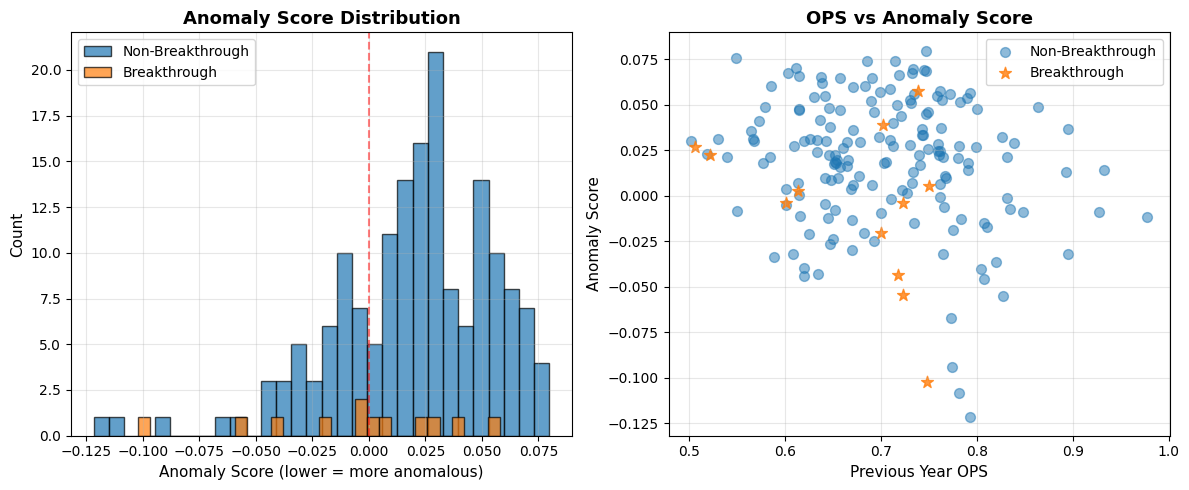


✅ 分析完成!


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# 把「突破年」當作「異常」來檢測
print("\n" + "="*70)
print("ISOLATION FOREST - ANOMALY DETECTION APPROACH")
print("="*70)

model = IsolationForest(
    contamination=0.1,  # 預期 10% 是異常(突破年)
    random_state=42,
    n_estimators=100
)

# 訓練 (只用特徵,不用標籤)
model.fit(X_train)

print("✅ 訓練完成!")

# 預測 (-1 = 異常/突破, 1 = 正常/非突破)
y_train_pred_raw = model.predict(X_train)
y_test_pred_raw = model.predict(X_test)

# 轉換成 0/1 格式 (原本 -1/1 → 轉成 1/0)
# -1 (異常) → 1 (突破)
# 1 (正常) → 0 (非突破)
y_train_pred = (y_train_pred_raw == -1).astype(int)
y_test_pred = (y_test_pred_raw == -1).astype(int)

# 異常分數 (分數越低 = 越異常 = 越可能突破)
y_train_scores = model.decision_function(X_train)
y_test_scores = model.decision_function(X_test)

# 評估模型
print("\n" + "="*70)
print("MODEL EVALUATION")
print("="*70)

print("\n📊 Training Set (2015-2024):")
print(classification_report(y_train, y_train_pred,
                          target_names=['Non-Breakthrough', 'Breakthrough'],
                          zero_division=0))

print("\n📊 Test Set (2025):")
print(classification_report(y_test, y_test_pred,
                          target_names=['Non-Breakthrough', 'Breakthrough'],
                          zero_division=0))

# 混淆矩陣
print("\n📋 Confusion Matrix (2025 Test Set):")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]:3d} | False Positives: {cm[0,1]:3d}")
print(f"False Negatives: {cm[1,0]:3d} | True Positives:  {cm[1,1]:3d}")

accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print(f"\nAccuracy: {accuracy:.2%}")

# 查看預測分佈
print(f"\n預測分佈:")
print(f"預測會突破: {y_test_pred.sum()} / {len(y_test)} ({y_test_pred.mean():.1%})")
print(f"實際突破: {y_test.sum()} / {len(y_test)} ({y_test.mean():.1%})")

# 2025 年預測結果
print("\n" + "="*70)
print("2025 PREDICTIONS")
print("="*70)

test_results = test_data[['last_name, first_name', 'player_age', 'mlb_years',
                          'ops_prev', 'on_base_plus_slg', 'breakthrough']].copy()
test_results['predicted'] = y_test_pred
test_results['anomaly_score'] = y_test_scores  # 分數越低越異常

# 按異常分數排序 (最異常的 = 最可能突破)
print("\n🔮 最可能突破的球員 (Top 15 by anomaly score):")
top_anomalies = test_results.nsmallest(15, 'anomaly_score')
print(top_anomalies[['last_name, first_name', 'ops_prev', 'on_base_plus_slg',
                     'breakthrough', 'predicted', 'anomaly_score']].to_string(index=False))

print("\n✅ 實際突破且預測正確 (True Positives):")
true_positives = test_results[(test_results['breakthrough'] == 1) &
                              (test_results['predicted'] == 1)]
if len(true_positives) > 0:
    print(true_positives.sort_values('anomaly_score')[
        ['last_name, first_name', 'ops_prev', 'on_base_plus_slg', 'anomaly_score']
    ].to_string(index=False))
else:
    print("無")

print("\n❌ 實際突破但預測錯誤 (False Negatives):")
false_negatives = test_results[(test_results['breakthrough'] == 1) &
                               (test_results['predicted'] == 0)]
if len(false_negatives) > 0:
    print(false_negatives.sort_values('anomaly_score')[
        ['last_name, first_name', 'ops_prev', 'on_base_plus_slg', 'anomaly_score']
    ].to_string(index=False))
else:
    print("無")

print("\n⚠️  預測突破但實際沒有 (False Positives):")
false_positives = test_results[(test_results['breakthrough'] == 0) &
                               (test_results['predicted'] == 1)]
if len(false_positives) > 0:
    print(false_positives.sort_values('anomaly_score').head(10)[
        ['last_name, first_name', 'ops_prev', 'on_base_plus_slg', 'anomaly_score']
    ].to_string(index=False))
else:
    print("無")

# 視覺化異常分數分佈
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(test_results[test_results['breakthrough']==0]['anomaly_score'],
         bins=30, alpha=0.7, label='Non-Breakthrough', edgecolor='black')
plt.hist(test_results[test_results['breakthrough']==1]['anomaly_score'],
         bins=30, alpha=0.7, label='Breakthrough', edgecolor='black')
plt.xlabel('Anomaly Score (lower = more anomalous)', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Anomaly Score Distribution', fontsize=13, fontweight='bold')
plt.legend()
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(test_results[test_results['breakthrough']==0]['ops_prev'],
           test_results[test_results['breakthrough']==0]['anomaly_score'],
           alpha=0.5, label='Non-Breakthrough', s=50)
plt.scatter(test_results[test_results['breakthrough']==1]['ops_prev'],
           test_results[test_results['breakthrough']==1]['anomaly_score'],
           alpha=0.8, label='Breakthrough', s=80, marker='*')
plt.xlabel('Previous Year OPS', fontsize=11)
plt.ylabel('Anomaly Score', fontsize=11)
plt.title('OPS vs Anomaly Score', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ 分析完成!")

分析樣本數: 1519

Pearson 相關係數矩陣:
                    barrel_batted_rate  exit_velocity_avg  pull_percent  \
barrel_batted_rate            1.000000           0.760751      0.334103   
exit_velocity_avg             0.760751           1.000000      0.099401   
pull_percent                  0.334103           0.099401      1.000000   
flyballs_percent              0.586065           0.305183      0.518484   

                    flyballs_percent  
barrel_batted_rate          0.586065  
exit_velocity_avg           0.305183  
pull_percent                0.518484  
flyballs_percent            1.000000  


各變數之間的相關性分析 (Pearson):
Barrel Rate vs Exit Velocity:
  相關係數 r = 0.7608
  p-value = 0.000000 ***

Barrel Rate vs Pull%:
  相關係數 r = 0.3341
  p-value = 0.000000 ***

Barrel Rate vs Fly Ball%:
  相關係數 r = 0.5861
  p-value = 0.000000 ***

Exit Velocity vs Pull%:
  相關係數 r = 0.0994
  p-value = 0.000104 ***

Exit Velocity vs Fly Ball%:
  相關係數 r = 0.3052
  p-value = 0.000000 ***

Pull% vs Fly Ball%:
  相關係

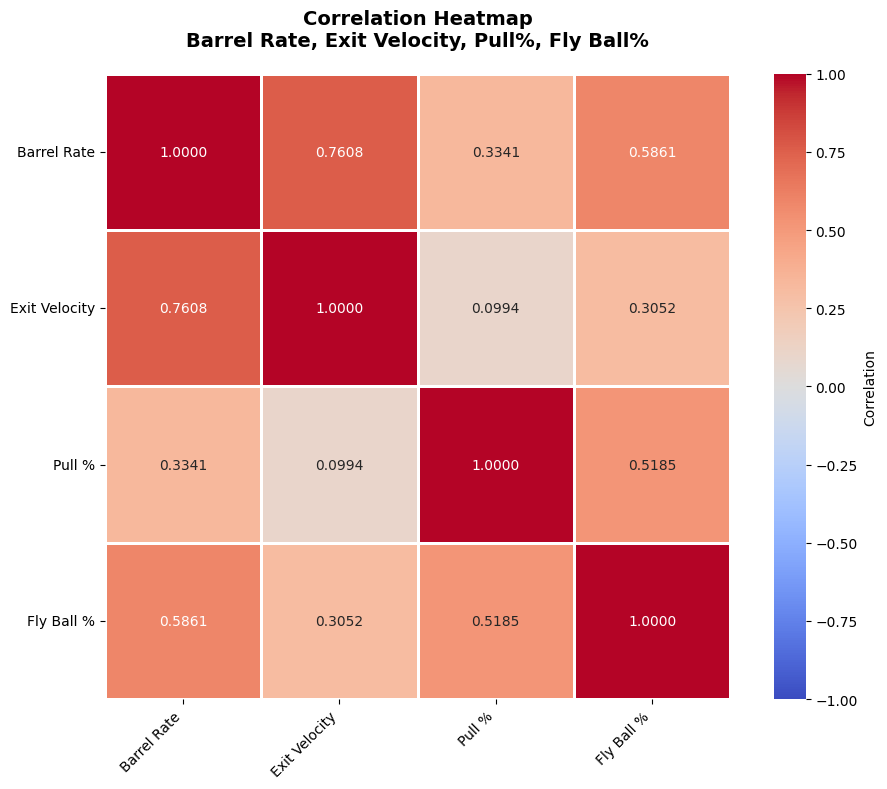

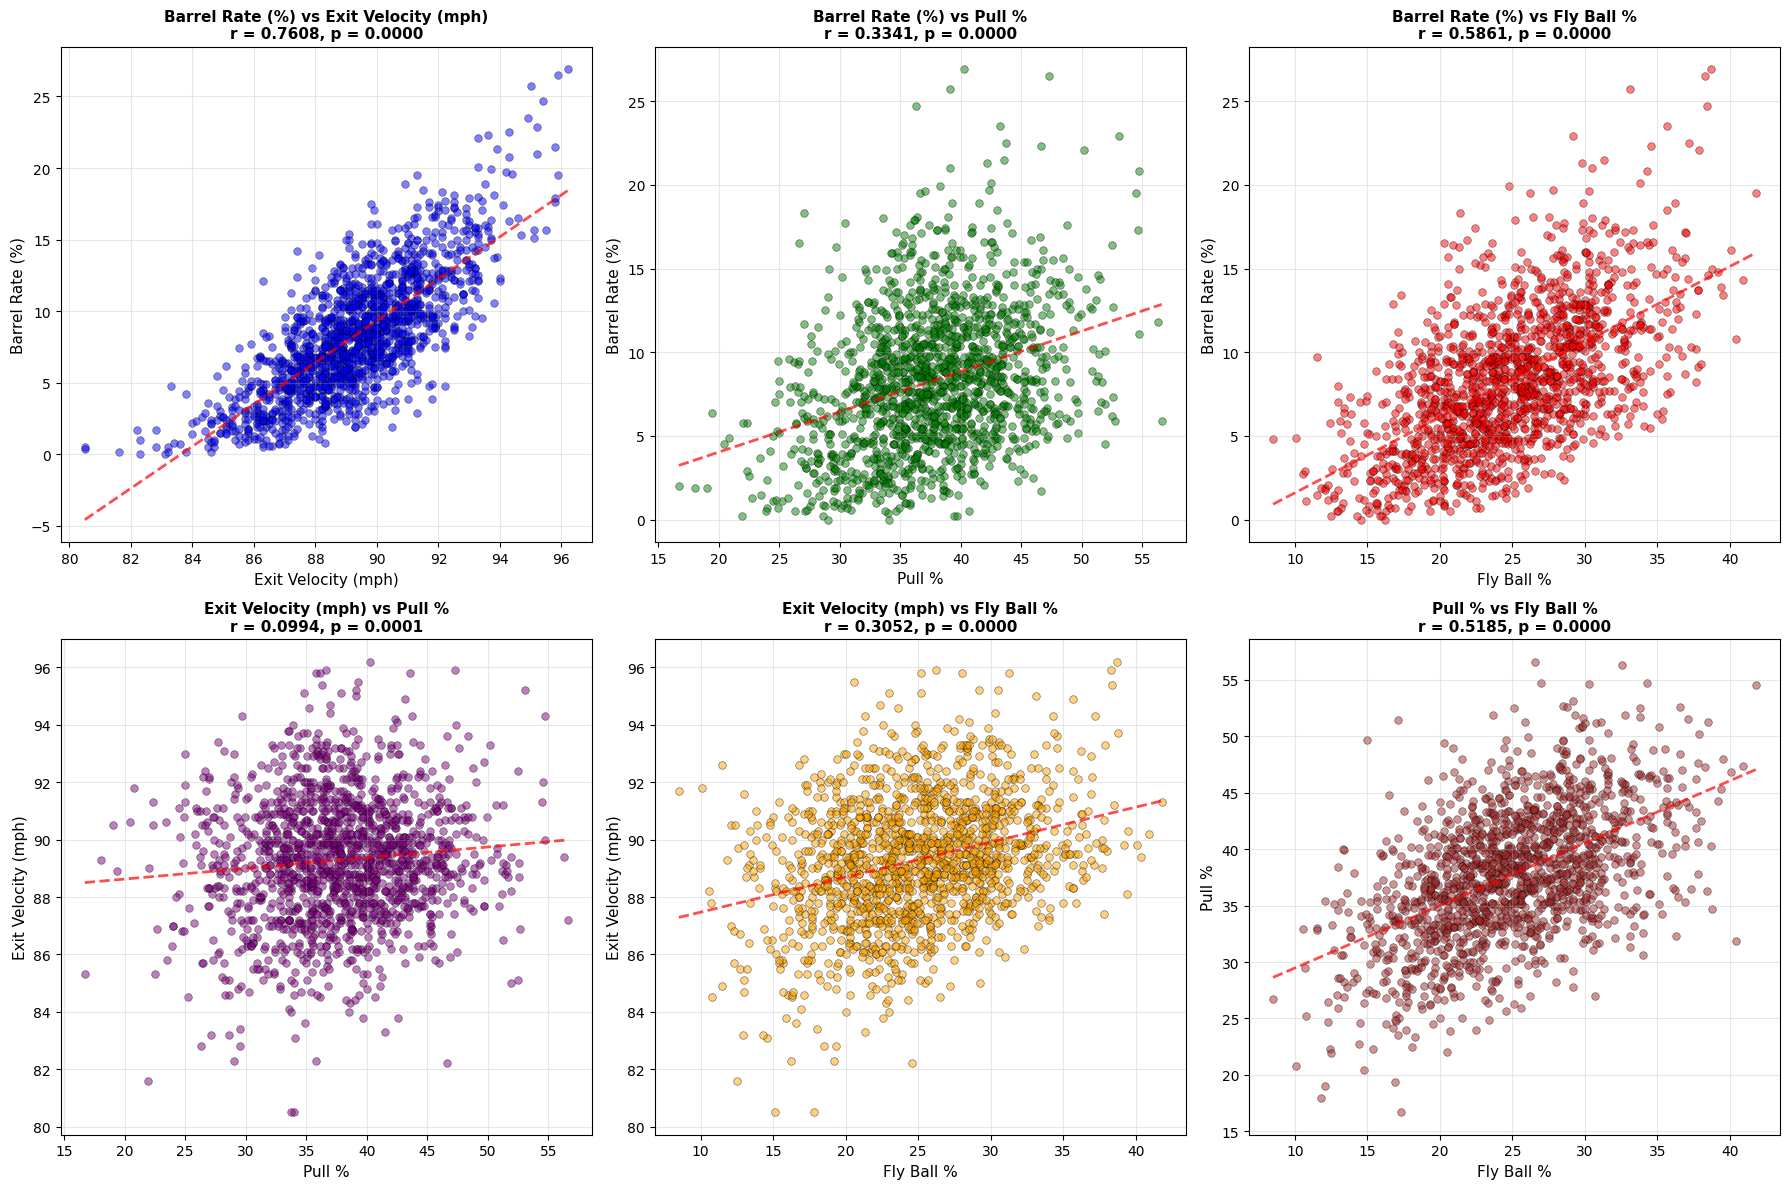

<Figure size 1200x1000 with 0 Axes>

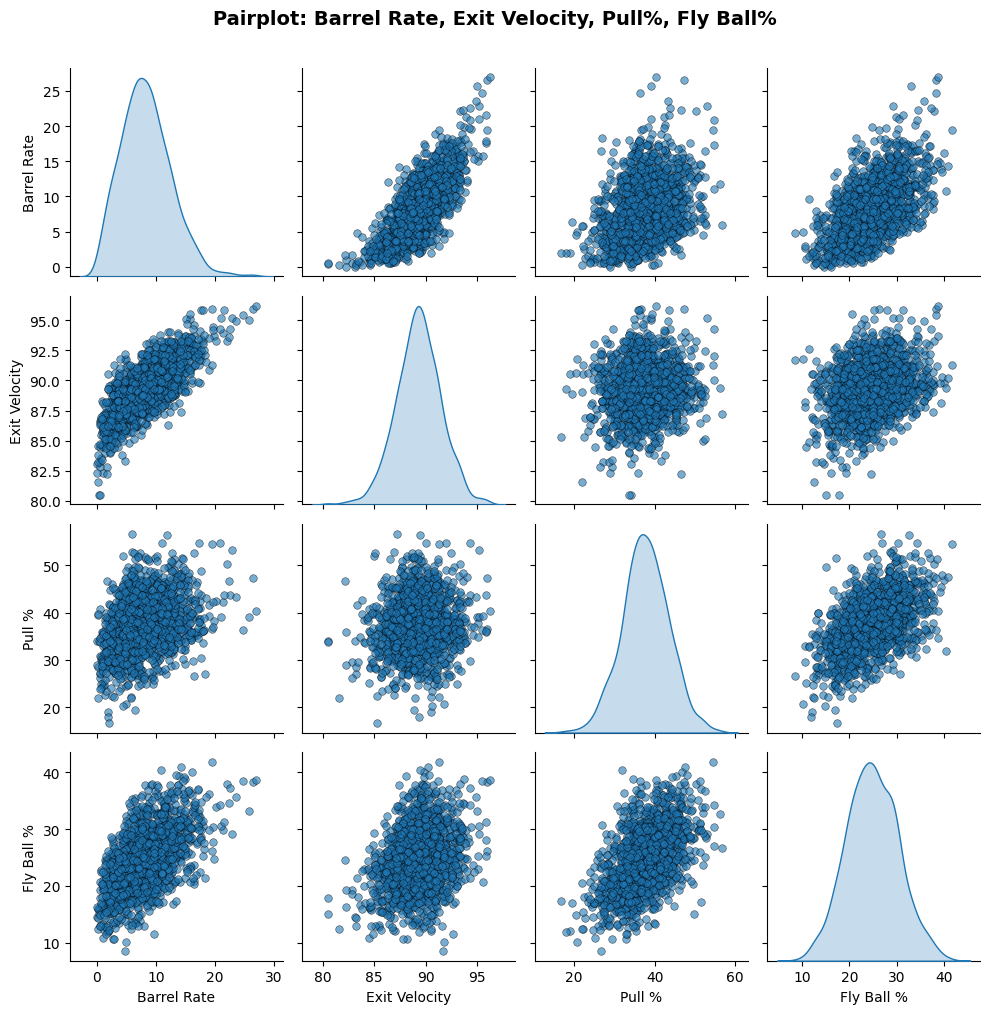

關鍵發現總結:
Barrel Rate 與 Exit Velocity: 正相關 (強), r=0.7608
Barrel Rate 與 Pull%: 正相關 (中等), r=0.3341
Barrel Rate 與 Fly Ball%: 正相關 (強), r=0.5861
Exit Velocity 與 Pull%: 正相關 (弱), r=0.0994
Exit Velocity 與 Fly Ball%: 正相關 (中等), r=0.3052
Pull% 與 Fly Ball%: 正相關 (強), r=0.5185


In [ ]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("stats.csv")

# 選擇要分析的四個變數
variables = ['barrel_batted_rate', 'exit_velocity_avg', 'pull_percent', 'flyballs_percent']
var_names = ['Barrel Rate', 'Exit Velocity', 'Pull %', 'Fly Ball %']

# 移除缺失值
df_clean = df[variables].dropna()

print(f"分析樣本數: {len(df_clean)}\n")

# 計算相關係數矩陣 (Pearson)
correlation_matrix = df_clean.corr()

print("=" * 70)
print("Pearson 相關係數矩陣:")
print("=" * 70)
print(correlation_matrix)
print("\n")

# 重新命名以便更好地顯示
correlation_matrix_display = correlation_matrix.copy()
correlation_matrix_display.index = var_names
correlation_matrix_display.columns = var_names

# 顯示所有兩兩相關性
print("=" * 70)
print("各變數之間的相關性分析 (Pearson):")
print("=" * 70)

pairs = [
    ('barrel_batted_rate', 'exit_velocity_avg', 'Barrel Rate', 'Exit Velocity'),
    ('barrel_batted_rate', 'pull_percent', 'Barrel Rate', 'Pull%'),
    ('barrel_batted_rate', 'flyballs_percent', 'Barrel Rate', 'Fly Ball%'),
    ('exit_velocity_avg', 'pull_percent', 'Exit Velocity', 'Pull%'),
    ('exit_velocity_avg', 'flyballs_percent', 'Exit Velocity', 'Fly Ball%'),
    ('pull_percent', 'flyballs_percent', 'Pull%', 'Fly Ball%')
]

for var1, var2, name1, name2 in pairs:
    r, p = stats.pearsonr(df_clean[var1], df_clean[var2])
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else '(不顯著)'
    print(f"{name1} vs {name2}:")
    print(f"  相關係數 r = {r:.4f}")
    print(f"  p-value = {p:.6f} {sig}")
    print()

# 描述性統計
print("=" * 70)
print("描述性統計:")
print("=" * 70)
desc_stats = df_clean.describe()
desc_stats.columns = var_names
print(desc_stats)
print()

# ============ 視覺化 ============

# 1. 相關性熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_display, annot=True, cmap='coolwarm', center=0,
            fmt='.4f', square=True, linewidths=2, cbar_kws={'label': 'Correlation'},
            vmin=-1, vmax=1)
plt.title('Correlation Heatmap\nBarrel Rate, Exit Velocity, Pull%, Fly Ball%',
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. 散點圖矩陣 (重點關注 Barrel Rate 與其他三個變數)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

plot_configs = [
    ('exit_velocity_avg', 'barrel_batted_rate', 'Exit Velocity (mph)', 'Barrel Rate (%)', 0),
    ('pull_percent', 'barrel_batted_rate', 'Pull %', 'Barrel Rate (%)', 1),
    ('flyballs_percent', 'barrel_batted_rate', 'Fly Ball %', 'Barrel Rate (%)', 2),
    ('pull_percent', 'exit_velocity_avg', 'Pull %', 'Exit Velocity (mph)', 3),
    ('flyballs_percent', 'exit_velocity_avg', 'Fly Ball %', 'Exit Velocity (mph)', 4),
    ('flyballs_percent', 'pull_percent', 'Fly Ball %', 'Pull %', 5)
]

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for x_var, y_var, x_label, y_label, idx in plot_configs:
    r, p = stats.pearsonr(df_clean[x_var], df_clean[y_var])

    axes[idx].scatter(df_clean[x_var], df_clean[y_var],
                     alpha=0.5, s=30, color=colors[idx],
                     edgecolors='black', linewidth=0.5)
    axes[idx].set_xlabel(x_label, fontsize=11)
    axes[idx].set_ylabel(y_label, fontsize=11)
    axes[idx].set_title(f'{y_label} vs {x_label}\nr = {r:.4f}, p = {p:.4f}',
                       fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

    # 添加趨勢線
    z = np.polyfit(df_clean[x_var], df_clean[y_var], 1)
    p_line = np.poly1d(z)
    x_sorted = df_clean[x_var].sort_values()
    axes[idx].plot(x_sorted, p_line(x_sorted), "r--", linewidth=2, alpha=0.7)

plt.tight_layout()
plt.show()

# 3. 配對圖 (Pair Plot)
plt.figure(figsize=(12, 10))
df_plot = df_clean.copy()
df_plot.columns = var_names
sns.pairplot(df_plot, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'black'})
plt.suptitle('Pairplot: Barrel Rate, Exit Velocity, Pull%, Fly Ball%',
             y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. 關鍵發現總結
print("=" * 70)
print("關鍵發現總結:")
print("=" * 70)
for var1, var2, name1, name2 in pairs:
    r, p = stats.pearsonr(df_clean[var1], df_clean[var2])
    if abs(r) > 0.5:
        strength = "強"
    elif abs(r) > 0.3:
        strength = "中等"
    else:
        strength = "弱"

    direction = "正" if r > 0 else "負"
    print(f"{name1} 與 {name2}: {direction}相關 ({strength}), r={r:.4f}")